# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## OV


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_OV.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">October 11th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
    
- [x] Apply on Cancer Datasets
    > OV

* Target (Cancer) data: 
    - *OV_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
OV_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/OV_Interface_2021-09-28.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-10/ffa0e9d0/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-10-11 00:32:18 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-10\ffa0e9d0\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: OV

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-10-11 00:32:18 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-10-11 00:32:18 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-10-11 00:32:18 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-10-11 00:32:18 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-10-11 00:32:18 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


#### TCGA Cancer Datasets

##### OV

In [4]:
display_data(predator.data_materials["ov"])

Data dimensions: (5086, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


#### Preprocessed TCGA Cancer Datasets

##### OV

In [5]:
display_data(predator.data_materials["target_ov_data"])

Data dimensions: (5086, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,D59E,P52565,0.9263,0.915529,0.9394,0.914711,1.492640,0.999329,0.046801,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.880,3.18062,3.18062
1,P08134,D59E,P52565-2,0.9263,0.915529,0.7222,0.708487,0.762694,0.999029,0.004062,...,344.0,62.3140,63.0691,32.5038,32.5038,598.710,417.740,1016.460,3.80414,3.80414
2,P62993,A3V,Q9H8V3-2,0.4444,0.463595,0.2792,0.262235,1.964490,-0.080548,0.456549,...,280.0,23.2774,24.5177,122.5120,122.5120,170.810,120.515,291.325,4.63364,4.63364


### Voting mode: `hard`

In [6]:
predator.predict(voting='hard')

2021-10-11 00:32:19 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | Voting mode: hard
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsHard
2021-10-11 00:32:19 | DEBUG    | Predator | Predicting on ov cohort ..
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | X shape: (5086, 10)
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-10-11 00:32:19 | DEBUG    | helpers.helpers_predator.models | X shap

In [7]:
# Predictions for first 10 experiment.
predator.predictions["ov"][:3]

[array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64)]

2021-10-11 00:32:22 | DEBUG    | helpers.helpers_predator.predictions | Initializing value counts ..


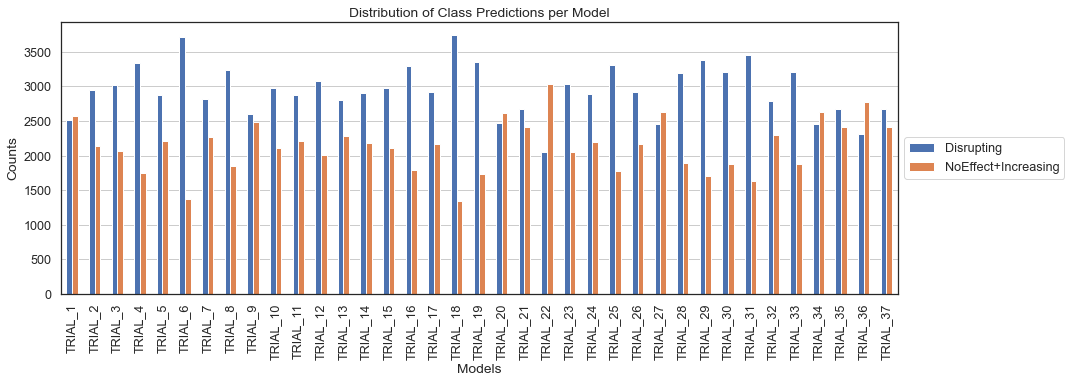

In [8]:
predator.predictions.plot_predictions_distributions("ov")

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{0, 1 or "NoVote"} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries which predicted as both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may be classified both 0 and 1. We drop such instances.

In [9]:
predator.predictions_post_process()

2021-10-11 00:32:23 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-10-11 00:32:23 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-10-11 00:32:23 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-10-11 00:32:23 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-11 00:32:34 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 359): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           0  O75175    Q684H     Q9NZN8
1           1  O75175    Q684H     Q9NZN8
2           1  O75175    Q684H     Q9NZN8
3           1  O75175    Q684H     Q9NZN8
4           1  O75175    Q684H     Q9NZN8
2021-10-11 00:32:46 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 776): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           0  O75175    Q684H     Q9NZN8
1           0  O75175    Q684H     Q9NZN8
2           0  O75175    Q684H     Q9NZN8
3           1  O75175    Q684H     Q9NZN8
4           0  O75175    Q684H     Q9NZN8
2021-10-11 00:32:58 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 730): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0           1  P07332    N695H     P08581
1           0  P07332    N695H     P08581
2      

In [10]:
display_data(predator.predictions["ov_predicted_datasets"][0])

Data dimensions: (5086, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,1,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


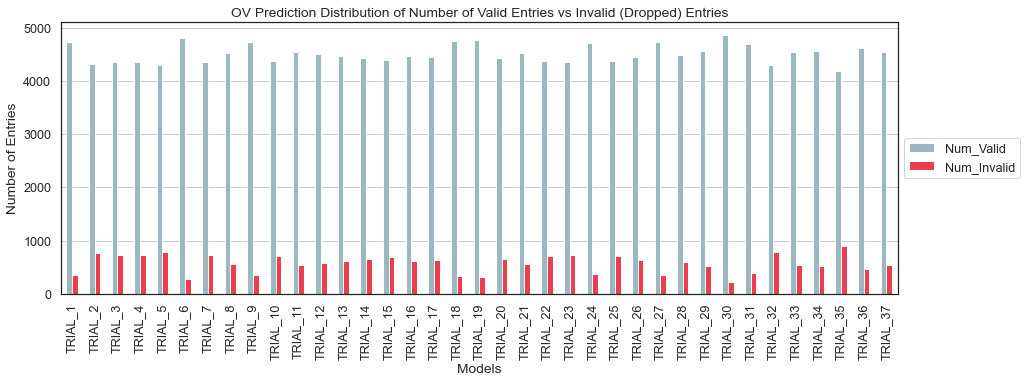

In [11]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-10-11 00:39:32 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


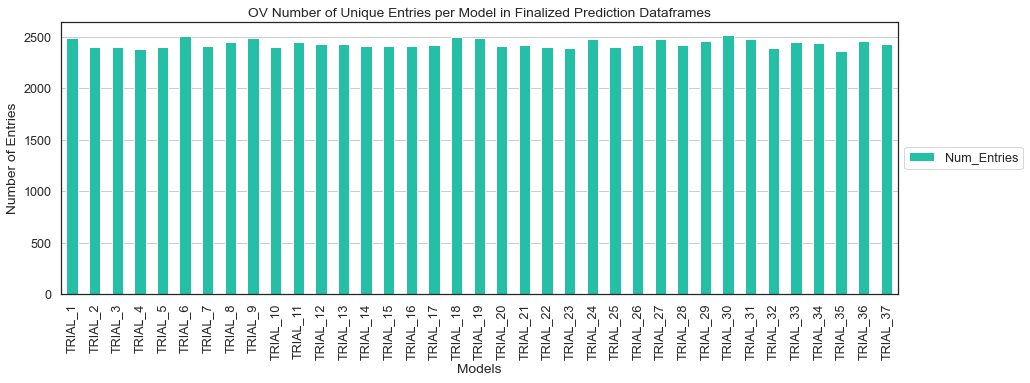

In [12]:
predator.predictions.plot_num_finalized_predictions("ov")

In [13]:
predator.prepare_ensemble_prediction_data()

2021-10-11 00:39:32 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-10-11 00:39:32 | DEBUG    | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov ..


  0%|          | 0/2578 [00:00<?, ?it/s]

2021-10-11 00:41:59 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
2021-10-11 00:41:59 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-10-11 00:41:59 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [14]:
display_data(predator.predictions["ov_ensemble_prediction_data"])

Data dimensions: (2578, 7)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Num_preds_0,Num_preds_1,Num_preds_NO_VOTE,VOTED_PREDICTION
0,P08134,D59E,P52565,36,0,1,0
1,P62993,A3V,Q9H8V3,24,13,0,0
2,P62993,A3V,Q14155,17,20,0,1


In [15]:
display_data(predator.data_materials["ov"])

Data dimensions: (5086, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


In [16]:
display_data(predator.data_materials["Xs_ov"][0])

Data dimensions: (5086, 10)


,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Matrix_score,Solvent_accessibility_wt,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,Model/DOPE_score
0,-3.575,2.100875,1.492640,0.914711,1.0,2.776620,2.114950,-29.31280,0.9394,-0.933072
1,-3.575,2.286398,0.762694,0.708487,1.0,2.382430,2.153380,-22.65540,0.7222,-0.573655
2,-3.110,-1.475353,1.964490,0.262235,0.0,0.394442,0.281167,-6.95953,0.2792,-0.590484


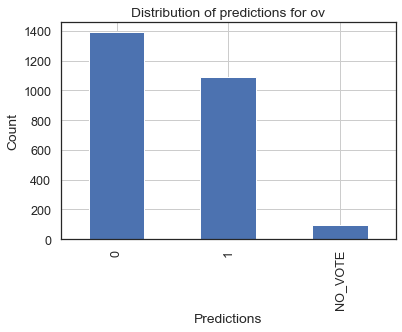

In [17]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [18]:
ov_prediction_results_hard = predator.predictions["ov_prediction_results"]
display_data(ov_prediction_results_hard)

Data dimensions: (2578, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


In [19]:
ov_ensemble_prediction_data_hard = predator.predictions["ov_ensemble_prediction_data"]

In [20]:
ov_prediction_results_hard_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
display_data(ov_prediction_results_hard_no_votes_dropped)

Data dimensions: (2481, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


Label counts:
Disrupting                1392
Increasing + No Effect    1089
Name: Prediction, dtype: int64


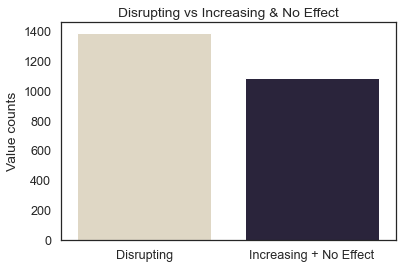

In [21]:
visualize_label_counts(ov_prediction_results_hard_no_votes_dropped, 'Prediction')

### Voting mode: `soft`

In [22]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('ov', OV_PATH)]
)

2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `ov` ..
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_ov_data` ..
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'Model/DOPE_score']
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_ov data materials  ..


In [23]:
predator.predict(voting='soft')

2021-10-11 00:42:00 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-10-11 00:42:00 | DEBUG    | Predator | Predicting on ov cohort ..
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=None,
                       min_samples_split=5, n_estimators=50, random_state=1)
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | X shape: (5086, 10)
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=2)
2021-10-11 00:42:00 | DEBUG    | helpers.helpers_predator.models | X shap

In [24]:
predator.predictions.keys()

dict_keys(['ov_prob'])

In [25]:
# Predictions for first 10 experiment.
predator.predictions["ov_prob"][:3]

[array([[0.74189909, 0.25810091],
        [0.68663109, 0.31336891],
        [0.45038587, 0.54961413],
        ...,
        [0.71643212, 0.28356788],
        [0.6309161 , 0.3690839 ],
        [0.71118139, 0.28881861]]),
 array([[0.6125699 , 0.3874301 ],
        [0.73938666, 0.26061334],
        [0.46093971, 0.53906029],
        ...,
        [0.83785925, 0.16214075],
        [0.74708342, 0.25291658],
        [0.66366035, 0.33633965]]),
 array([[0.83003883, 0.16996117],
        [0.96933555, 0.03066445],
        [0.42633114, 0.57366886],
        ...,
        [0.83897755, 0.16102245],
        [0.83606272, 0.16393728],
        [0.83606272, 0.16393728]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

--- todo  add documentation

In [26]:
predator.predictions_post_process()

2021-10-11 00:42:03 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:42:03 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort ov ..
2021-10-11 00:42:03 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:42:03 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with ov cancer dataset ..
2021-10-11 00:42:03 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-11 00:42:15 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 359): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.465187  O75175    Q684H     Q9NZN8
1    0.553470  O75175    Q684H     Q9NZN8
2    0.537381  O75175    Q684H     Q9NZN8
3    0.526089  O75175    Q684H     Q9NZN8
4    0.553470  O75175    Q684H     Q9NZN8
2021-10-11 00:42:27 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 776): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.255194  O75175    Q684H     Q9NZN8
1    0.452007  O75175    Q684H     Q9NZN8
2    0.383825  O75175    Q684H     Q9NZN8
3    0.513785  O75175    Q684H     Q9NZN8
4    0.452007  O75175    Q684H     Q9NZN8
2021-10-11 00:42:40 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 730): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.593597  P07332    N695H     P08581
1    0.417783  P07332    N695H     P08581
2    0.

In [27]:
predator.predictions.keys()

dict_keys(['ov_prob', 'ov_predicted_probs_datasets', 'ov_predicted_valid_datasets', 'ov_predicted_invalid_datasets', 'ov_finalized_prediction_dataframes'])

In [28]:
display_data(predator.predictions["ov_predicted_probs_datasets"][0])

Data dimensions: (5086, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.258101,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,388.0,53.3423,55.3148,37.8150,37.8150,719.095,461.785,1180.88,3.18062,3.18062
1,0.313369,P08134,P08134,D59E,done,interface,COSM72427,-,-,Ras,...,344.0,62.3140,63.0691,32.5038,32.5038,598.71,417.74,1016.46,3.80414,3.80414
2,0.549614,P62993,P62993,A3V,done,interface,-,-,-,SH3_1,...,280.0,23.2774,24.5177,122.5120,122.5120,170.81,120.515,291.325,4.63364,4.63364


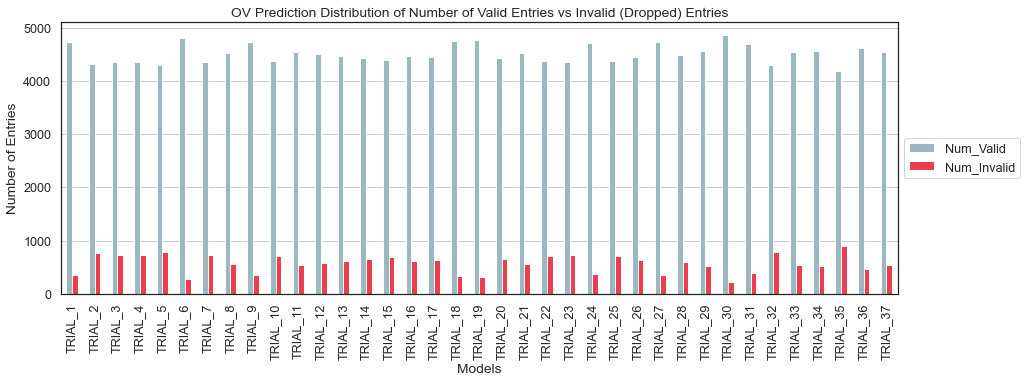

In [29]:
predator.predictions.plot_distribution_valid_vs_invalid("ov")

2021-10-11 00:49:41 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


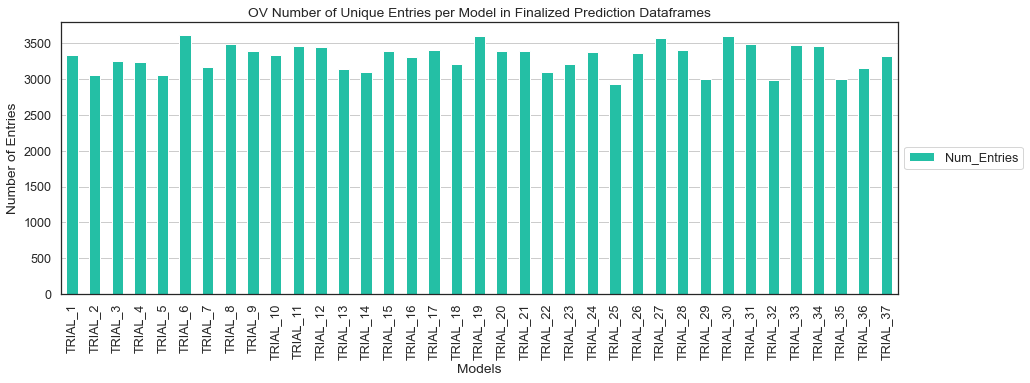

In [31]:
predator.predictions.plot_num_finalized_predictions("ov")

In [32]:
display_data(predator.predictions['ov_finalized_prediction_dataframes'][0])

Data dimensions: (3337, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.258101,P08134,D59E,P52565
1,0.313369,P08134,D59E,P52565
2,0.549614,P62993,A3V,Q9H8V3


In [33]:
predator.prepare_ensemble_prediction_data()

2021-10-11 00:49:42 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-10-11 00:49:42 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for ov taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-10-11 00:52:31 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for ov is prepared.
Accessible from `ov_predictions_prob_data`.
2021-10-11 00:52:31 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for ov is prepared.
Accessible from `ov_ensemble_prediction_data`.
2021-10-11 00:52:31 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for ov.
Accessible from predictions.['ov_prediction_results']
2021-10-11 00:52:31 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for ov.
Accessible from predictions.['ov_prediction_results_no_votes_dropped']


In [34]:
display_data(predator.predictions['ov_predictions_prob_data'])

Data dimensions: (2578, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.285735,0.324022,0.100313,0.183961,0.34,0.33657,0.249208,0.203588,0.461873,0.196921,...,0.327551,0.289581,0.113124,0.226729,0.454805,0.34616,0.459367,0.303253,0.26787,0
1,0.549614,0.53906,0.573669,0.536013,0.32,0.416451,0.545645,0.378409,0.595046,0.524716,...,0.458546,0.359192,0.328969,0.306549,0.53143,0.413095,0.499573,0.405714,0.45855,0
2,0.554122,0.613663,0.498702,0.242433,0.28,0.495152,0.725,0.503368,0.623617,0.421751,...,0.562074,0.490024,0.491228,0.342821,0.633458,0.6,0.61922,0.435556,0.50337,1


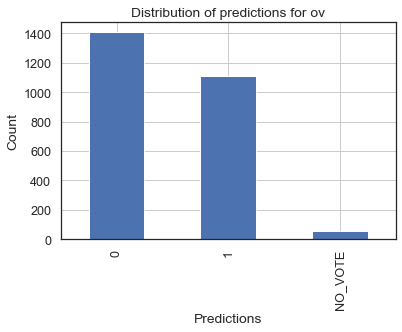

In [35]:
predator.predictions.plot_ensemble_prediction_distribution("ov")

In [36]:
ov_prediction_results_soft = predator.predictions['ov_prediction_results']
display_data(ov_prediction_results_soft)

Data dimensions: (2578, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


In [37]:
ov_prediction_results_soft_no_votes_dropped = predator.predictions["ov_prediction_results_no_votes_dropped"]
display_data(ov_prediction_results_soft_no_votes_dropped)

Data dimensions: (2520, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


Label counts:
Disrupting                1410
Increasing + No Effect    1110
Name: Prediction, dtype: int64


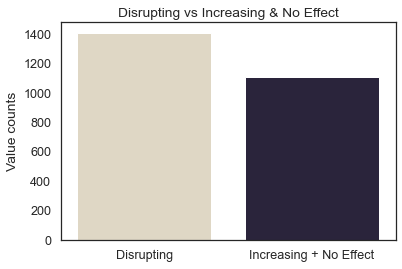

In [38]:
visualize_label_counts(ov_prediction_results_soft_no_votes_dropped, 'Prediction')

In [39]:
ov_ensemble_prediction_data_soft = predator.predictions["ov_ensemble_prediction_data"]

In [40]:
ov_predictions_prob_data_soft = predator.predictions["ov_predictions_prob_data"]

## Exporting Predictions

In [41]:
# ov_prediction_results = ov_prediction_results_hard_no_votes_dropped
ov_prediction_results = ov_prediction_results_soft_no_votes_dropped
display_data(ov_prediction_results)

Data dimensions: (2520, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P08134,D59E,P52565,0
1,P62993,A3V,Q9H8V3,0
2,P62993,A3V,Q14155,1


In [42]:
predator.export_prediction(
    tcga="ov",
    data=ov_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-10-11 00:52:33 | DEBUG    | helpers.helpers_predator.common | Folder with ID 38a5aa80 is created.
2021-10-11 00:52:33 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder ov_prediction_2021-10-11\38a5aa80..
2021-10-11 00:52:33 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/ov_prediction_2021-10-11\38a5aa80\predictions_soft_2021-10-11.csv is exported successfully.
2021-10-11 00:52:33 | INFO     | helpers.helpers_predator.common | Config is exported.


---